<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Реализация-и-проверка-алгоритма" data-toc-modified-id="Реализация-и-проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Реализация и проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Подготовительные-операции" data-toc-modified-id="Подготовительные-операции-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подготовительные операции</a></span></li><li><span><a href="#Разработка-класса-модели-LinearRegression" data-toc-modified-id="Разработка-класса-модели-LinearRegression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Разработка класса модели LinearRegression</a></span></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Тестирование моделей</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод по проекту</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Описание данных**
Набор данных находится в файле `/datasets/insurance.csv`  
•	***Признаки:*** пол, возраст и зарплата застрахованного, количество членов его семьи.  
•	***Целевой признак:*** количество страховых выплат клиенту за последние 5 лет.  


## Загрузка данных

In [1]:
#подключение библиотек, используемых в проекте
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression as sk_LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
def df_read_csv(file_name):
    try:
        df = pd.read_csv('/datasets/' + file_name)
    except:
        df = pd.read_csv('datasets\\' + file_name)
    return df

def df_show_info(df):
    df.info()
    display(df.head())
    print('Дубликатов в исходных данных: ',df.duplicated().sum())
    sb.pairplot(df)
    plt.subplots(figsize=(12,10))
    sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Дубликатов в исходных данных:  153


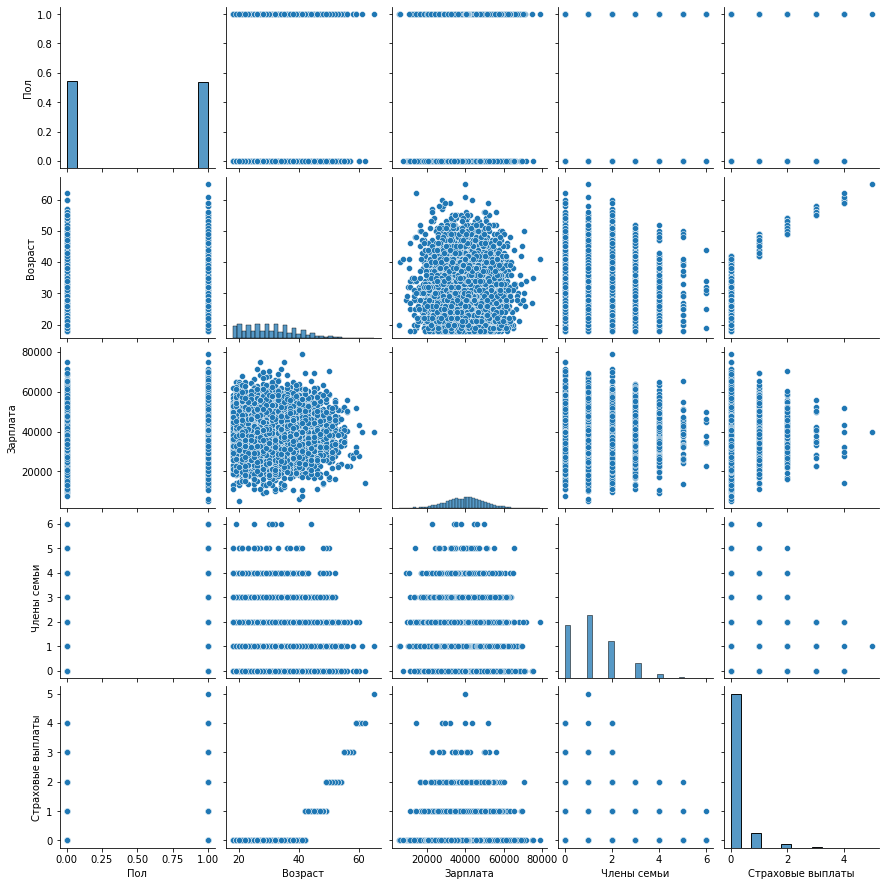

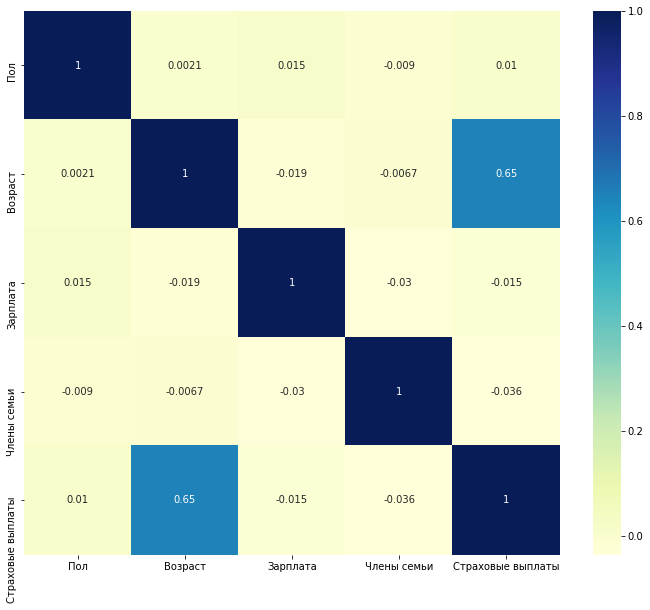

In [3]:
df = df_read_csv('insurance.csv')
df_show_info(df)

Возраст и зарплату преобразуем к типу int, тип float в данном случае не требуется

In [4]:
df = df.astype({'Возраст': 'int', 'Зарплата': 'int'})
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


### Выводы

- Данные успешно загружены из файла: `/datasets/insurance.csv`.
- Датасет содержит 5000 строк и 5 колонок. Пропусков в исходных данных нет.
- Присутствует 153 дубликата, но поскольку признаков у нас не так много и отсутствует id клиента, то возможно это данные разных клиентов. Соответственно удалять их не будем.  
- Целевой признак положительно коррелирует с возрастом клиентов, больше корреляций между признаками не наблюдается.  

## Умножение матриц

В данном разделе необходимо ответить на вопрос: **Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?**

Введем вспомогательные обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регрессии не изменится при условии что матрица $P$ невырождена (т.е. определитель не равен 0 и существует обратная матрица)

**Обоснование:** Учебник по линейной алгебре)))  
Применим некоторые свойства операций с матрицами. Пусть $A$ и $B$ - матрицы, $E$ - единичная матрица (единицы на главной диагонали), тогда выполнены следующие свойства:
$$
(AB)^T=B^T A^T
\\
AA^{-1}=A^{-1}A=E
\\
(A^T)^{-1}=(A^{-1})^T
\\
(AB)^{-1}=B^{-1} A^{-1}
$$

Введем вспомогательные обозначения для модифицированной модели:

- $\tilde a$ — предсказания модифицированной модели

- $\tilde X$ — матрица признаков (нулевой столбец состоит из единиц)

- $P$ — матрица, на которую умножаются признаки

- $\tilde w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Для модифицированной модели получим:  
Предсказания:

$$
\tilde a = \tilde X\tilde w
$$

Задача обучения:

$$
\tilde w = \arg\min_\tilde w MSE(\tilde X\tilde w, y)
$$

Формула обучения:

$$
\tilde w = (\tilde X^T \tilde X)^{-1} \tilde X^T y
$$

Исходя из условий задачи:
$$
\tilde X = XP
$$
Подставим данное выражение в формулу обучения и применим указанные выше свойства операций с матрицами для раскрытия скобок и упрощения выражения:
$$
\tilde w = (\tilde X^T \tilde X)^{-1} \tilde X^T y = ((XP)^T XP)^{-1} (XP)^T y = (P^T (X^T X) P)^{-1} (XP)^T y =
\\
= P^{-1}(X^T X)^{-1}(P^T)^{-1}P^TX^T y = P^{-1}(X^T X)^{-1}E X^T y = P^{-1}(X^T X)^{-1} X^T y = P^{-1} w 
$$

Получили, что веса модифицированной модели связаны с весами исходной модели следующим выражением:
$$
\tilde w = P^{-1} w
$$
домножим обе стороны полученного выражения слева на $P$ и получим выражение для нахождения весов исходной модели при известных весах модифицированной:
$$
w = P \tilde w
$$


Формулы, связывающие веса моделей мы получили. Осталось установить как между собой соотносятся $a$ и $\tilde a$  
$$
a = Xw = XEw = X(PP^{-1})w = (XP)(P^{-1}w) = \tilde X \tilde w = \tilde a 
$$
То есть $a = \tilde a$  
Причем, очевидно, что это верно не только для обучающей выборки, но и для тестовой.

При умножении матриц необходимо выполнение требования: **Число стобцов первой матрицы равно числу строк второй матрицы**. В нашем случае предъявляются дополнительные требования к матрице $P$ - обратимость (соответственно матрица должна быть квадратной). 
Получим что $P$ - обратимая квадратная матрица размера $[k,k]$, где $k$ - количество признаков в датасете

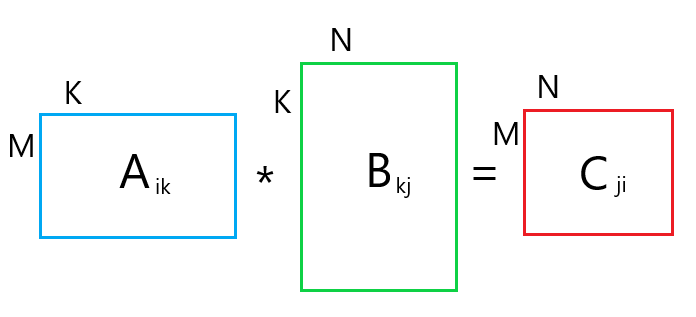

### Выводы

- Получено выражение связывающее веса исходной и модифицированной модели (полученной при умножении матрицы признаков исходной модели на обратимую матрицу).  
- Доказано с помощью аппарата линейной алгебры, что вектор предсказаний исходной и модифицированной модели совпадают.  
- Можно сделать вывод, что качество линейной регрессии не изменится (т.к. вектор предсказаний исходной и модифицированной модели идентичные, то и значения метрик качества также будут идентичными).

## Алгоритм преобразования

**Алгоритм:** На основании результатов предыдущего раздела, предлагается следующий алгоритм для защиты данных клиентов.  
- Генерируется случайная обратимая матрица $P$ размера $[k,k]$, где $k$ - количество признаков в датасете. При случайной генерации вероятность получения необратимой матрицы крайне мала (это возможно только при линейной зависимости строк или столбцов) 
- Матрица признаков домножается на полученную матрицу $P$, таким образом осуществляется шифрование исходных данных. Восстановить данные, не зная матрицу $P$ не получится.  
- На зашифрованных признаках обучается модель линейной регрессии, получается вектор весов.
- Далее для использования модели необходимо выборку с признаками по новым клиентам (новые объекты для использования модели) умножать на матрицу P и использовать модифицированную модель.  



**Обоснование**
Корректность алгоритма доказана результатами, полученными в разделе 2

### Выводы

Описан алгоритм обучения и применения модели линейной регрессии для предсказания количества страховых выплат клиенту, работающий с зашифрованными данными

## Реализация и проверка алгоритма

### Подготовительные операции

Полготовим обучающую выборку, сгенерируем матрицу P, зашифруем признаки, проверим корректность шифрования и возможность восстановления признаков

In [5]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [6]:
np.random.seed(42)
P = np.random.rand(features.shape[1], features.shape[1])
P

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848],
       [0.15601864, 0.15599452, 0.05808361, 0.86617615],
       [0.60111501, 0.70807258, 0.02058449, 0.96990985],
       [0.83244264, 0.21233911, 0.18182497, 0.18340451]])

In [7]:
P_inv = np.linalg.inv(P)
P_inv

array([[-0.32076901, -0.12766508,  0.06141427,  1.32518674],
       [ 0.35151041, -1.88500014,  1.65560045, -1.0003883 ],
       [ 1.14080312,  1.3467702 , -2.0407373 ,  0.70794071],
       [-0.08202687,  1.42666425, -0.17238177, -0.10600441]])

Проверим что $P*Pinv==E$

In [8]:
print(np.round(P@P_inv,10))

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0. -0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [8]:
features.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


In [9]:
features_encrypted = features@P
features_encrypted.head()

,0,1,2,3
0,29822.908329,35127.958687,1024.286164,48143.823952
1,22850.379746,26914.146043,785.064454,36896.601889
2,12627.939787,14874.047975,433.958805,20393.226004
3,25071.437266,29530.327057,859.956818,40463.797343
4,15693.844869,18486.012841,539.613636,25339.498732


In [10]:
features_restored = (np.array(np.round(features_encrypted@P_inv), dtype=int))
features_restored

array([[    1,    41, 49600,     1],
       [    0,    46, 38000,     1],
       [    0,    29, 21000,     0],
       ...,
       [    0,    20, 33900,     2],
       [    1,    22, 32700,     3],
       [    1,    28, 40600,     1]])

**Проверим, что признаки восстановлены корректно:**

In [11]:
if (np.array_equal(features, features_restored)==True):
    print('Восстановленные признаки идентичны исходным')
else:
    print('Ошибка преобразования данных. Обратитесь к разрабочику.')

Восстановленные признаки идентичны исходным


### Разработка класса модели LinearRegression

In [12]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = (np.linalg.inv(X.T@(X))@X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

### Тестирование моделей

Подготовим для тестирования 4 модели. Две из них будут работать с зашифрованными данными, две с исходными. Сравним качество обучения моделей с использованием метрики r2_score

In [13]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print('R2_score линейная регрессиия, незашифрованные данные', round(r2_score(target, predictions),5))

R2_score линейная регрессиия, незашифрованные данные 0.42495


In [14]:
model_encrypted = LinearRegression()
model_encrypted.fit(features_encrypted, target)
predictions = model_encrypted.predict(features_encrypted)
print('R2_score линейная регрессиия, зашифрованные данные', round(r2_score(target, predictions),5))

R2_score линейная регрессиия, зашифрованные данные 0.42495


In [15]:
model_sk = sk_LinearRegression()
model_sk.fit(features, target)
predictions = model_sk.predict(features)
print('R2_score линейная регрессиия из библиотеки sklearn, незашифрованные данные', round(r2_score(target, predictions),5))

R2_score линейная регрессиия из библиотеки sklearn, незашифрованные данные 0.42495


In [17]:
model_sk_encrypted = sk_LinearRegression()
model_sk_encrypted.fit(features, target)
predictions = model_sk_encrypted.predict(features)
print('R2_score линейная регрессиия из библиотеки sklearn, зашифрованные данные', round(r2_score(target, predictions),5))

R2_score линейная регрессиия из библиотеки sklearn, зашифрованные данные 0.42495


### Выводы

Результаты обучения подтвердили полученные в разделах 2 и 3 выводы. Значение метрики r2_score для всех 4-х моделей совпало. 

## Общий вывод по проекту

**При выполнении проекта:** 

**В разделе 1 проекта:**  
- Данные успешно загружены из файла: `/datasets/insurance.csv`.
- Датасет содержит 5000 строк и 5 колонок. Пропусков в исходных данных нет.
- Присутствует 153 дубликата, но поскольку признаков у нас не так много и отсутствует id клиента, то возможно это данные разных клиентов. Соответственно удалять их не будем.  
- Целевой признак положительно коррелирует с возрастом клиентов, больше корреляций между признаками не наблюдается.  

**В разделе 2 проекта:**  
- Получено выражение связывающее веса исходной и модифицированной модели (полученной при умножении матрицы признаков исходной модели на обратимую матрицу).  
- Доказано с помощью аппарата линейной алгебры, что вектор предсказаний исходной и модифицированной модели совпадают.  
- Можно сделать вывод, что качество линейной регрессии не изменится (т.к. вектор предсказаний исходной и модифицированной модели идентичные, то и значения метрик качества также будут идентичными).

**В разделе 3 проекта:**  
- Описан алгоритм обучения и применения модели линейной регрессии для предсказания количества страховых выплат клиенту, работающий с зашифрованными данными.

**В разделе 4 проекта:**  
- Разработана модель линейной регрессии
- Проверена работа модели с зашифрованными данными, проведено сравнение 2 видов моделей (разработанной и из пакета sklearn) при работе с зашифрованными и исходными данными, показана идентичность метрики r2_score для всех вариантов обучения.

**По итогу проекта Заказчику предлагается использовать следующий алгоритм, позволяющий защитить коннфиденциальные данные о клиентах:**  
- Генерируется случайная обратимая матрица $P$ размера $[k,k]$, где $k$ - количество признаков в датасете. При случайной генерации вероятность получения необратимой матрицы крайне мала (это возможно тольео при линейной зависимости строк или столбцов) 
- Матрица признаков домножается на полученную матрицу $P$, таким образом осуществляется шифрование исходных данных. Восстановить данные, не зная матрицу P не получится.  
- На зашифрованных признаках обучается модель линейной регрессии, получается ветор весов.
- Далее для использования модели необходимо выборку с признаками по новым клинетам (новые объекты для использования модели) умножать на матрицу P и использовать модифицированную модель. 


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования